In [2]:
import numpy as np
import scipy
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import qr, solve_triangular
import matplotlib as mpl
import matplotlib.pyplot as plt
import bspy

# ODE \#4

### $$y'(t)=2ty(t),\qquad y(0)=1$$

knots: [0.         0.         0.         0.         0.33333333 0.66666667
 1.         1.         1.         1.        ]
t: 0.0 index: 4 deriv bval: [-9.  9.  0.  0.] bval: [1. 0. 0. 0.]
t: 0.25 index: 4 deriv bval: [-0.5625   -2.390625  2.109375  0.84375 ] bval: [0.015625   0.45703125 0.45703125 0.0703125 ]
t: 0.5 index: 5 deriv bval: [-0.5625 -1.6875  1.6875  0.5625] bval: [0.03125 0.46875 0.46875 0.03125]
t: 0.75 index: 6 deriv bval: [-0.84375  -2.109375  2.390625  0.5625  ] bval: [0.0703125  0.45703125 0.45703125 0.015625  ]
t: 1.0 index: 6 deriv bval: [ 0.  0. -9.  9.] bval: [0. 0. 0. 1.]


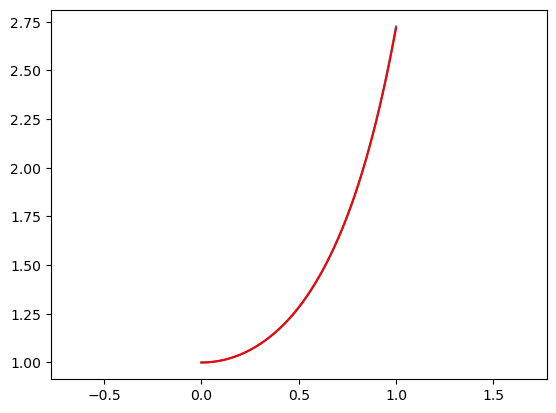

In [3]:
#set parameters
degree = 3
nknots = 2 #interior knots

#create knot vector
knots = np.linspace(0.0, 1.0, nknots + 2)
knots = np.array(degree * [knots[0]] + list(knots) + degree * [knots[-1]]) #add extra knots at beginning and end
print("knots:", knots)


#initialize order and dimension
order = degree + 1
n = len(knots) - order #dimension
#print("dimensions:", n)


collocationpoints = np.linspace(0.0, 1.0, n - 1)
#print("collocation points:", collocationpoints)

#initialize collocation matrix
collocation = np.zeros((n, n))
#print("initialized collocation array:", collocation)

#find index of first knot in the array that follows point of evaluation, set Bslipne boundary condition to 0.0 
ix = np.searchsorted(knots, 0.0, side = 'right')
ix = min(ix, n)
#print(knots, ix)


#fill collocation matrix with Bspline values at 0.0
bvalues = bspy.Spline.bspline_values(ix, knots, order, 0.0)
collocation[0, ix - order : ix] = bvalues
#print("initiallized collocation:", collocation)

for irow, t in enumerate(collocationpoints):
    ix = np.searchsorted(knots, t, side = 'right')
    ix = min(ix, n)
    
    #calculate Bspline and derivative at t
    bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvaluesp = bspy.Spline.bspline_values(ix, knots, order, t, 1)
    print("t:", t,"index:", ix, "deriv bval:", bvaluesp, "bval:", bvalues)
    
    #from the irow value after boundary condition (irow) insert y' - y
    collocation[irow + 1, ix - order : ix] = bvaluesp - 2 * t * bvalues 
   # print(collocation)
    
# Create the right hand side
rhs = np.zeros((n,))
rhs[0] = 1.0
#print("rhs:", rhs)

# Solve the linear system
lupiv = scipy.linalg.lu_factor(collocation)
alpha = scipy.linalg.lu_solve(lupiv, rhs)


#create spline function
u = bspy.Spline(1, 1, [order], [n], [knots], [alpha])
u(0.0), u(0.5), u(1.0)

#plot
plt.plot(*u.graph()(np.linspace(0.0,1.0,101)))
tvals = np.linspace(0, 1, 100)
plt.plot(tvals, np.exp(tvals ** 2 ), 'r')
plt.axis('equal')
plt.show()